In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Updated_Merged_Dataset.csv"
merged_df = pd.read_csv(file_path)

In [3]:
selected_features = ['HDI', 'TC', 'TD', 'STI', 'POP']

df = merged_df[selected_features + ['GDPCAP']].copy()
df['GDPCAP'] = df['GDPCAP'].astype(float)

X = df[selected_features]
y = df['GDPCAP']

k_best = SelectKBest(f_regression, k=3)
X_new = k_best.fit_transform(X, y)
selected_features = [selected_features[i] for i in k_best.get_support(indices=True)]

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20, random_state=42)

X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()

print(model.summary())

X_df = pd.DataFrame(X)
selected_features = X_df.columns[k_best.get_support()]
print(selected_features)

print("Index([\"HDI\", \"TD\", \"STI\"], dtype='object')'")

                            OLS Regression Results                            
Dep. Variable:                 GDPCAP   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 2.136e+04
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        06:19:57   Log-Likelihood:                -6099.9
No. Observations:               10053   AIC:                         1.221e+04
Df Residuals:                   10049   BIC:                         1.224e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8865      0.061     64.105      0.0

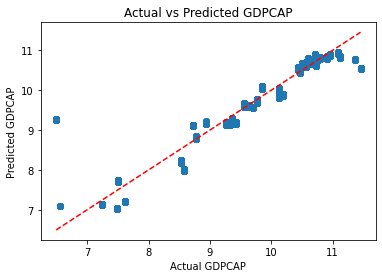

In [4]:
predicted_values = model.predict(X_train_const)
plt.scatter(y_train, predicted_values)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual GDPCAP')
plt.ylabel('Predicted GDPCAP')
plt.title('Actual vs Predicted GDPCAP')
plt.show()

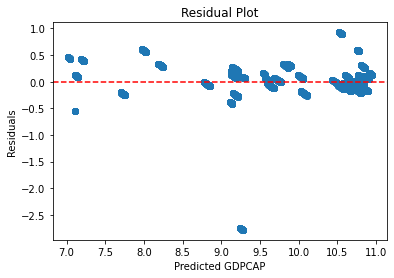

In [4]:
residuals = y_train - predicted_values
plt.scatter(predicted_values, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted GDPCAP')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [5]:
selected_features = ['HDI', 'TC', 'TD', 'STI', 'POP']

df = merged_df[selected_features + ['GDPCAP']].copy()
df['GDPCAP'] = df['GDPCAP'].astype(float)

X = df[selected_features]
y = df['GDPCAP']

k_best = SelectKBest(f_regression, k=3)
X_new = k_best.fit_transform(X, y)
selected_features = [selected_features[i] for i in k_best.get_support(indices=True)]

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=42)

X_train_df = pd.DataFrame(X_train, columns=selected_features)
X_train_const = sm.add_constant(X_train_df)

model = sm.OLS(y_train.reset_index(drop=True), X_train_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 GDPCAP   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 1.973e+04
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        05:37:58   Log-Likelihood:                -5769.5
No. Observations:                9425   AIC:                         1.155e+04
Df Residuals:                    9421   BIC:                         1.158e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8607      0.063     61.193      0.0

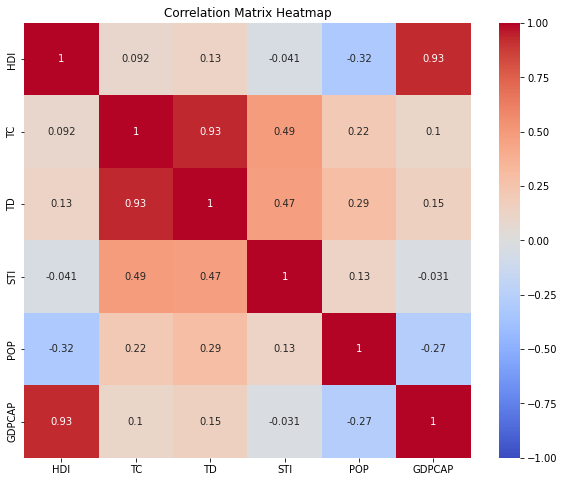

In [6]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

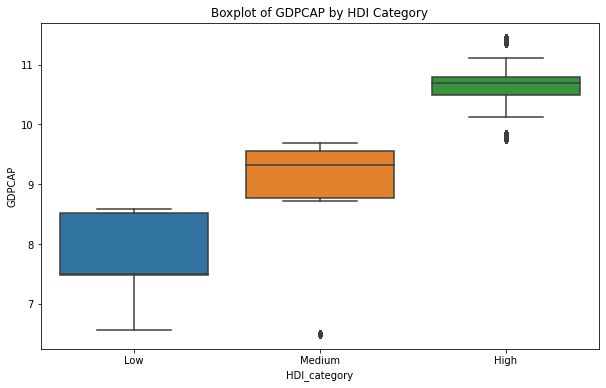

In [7]:
df['HDI_category'] = pd.cut(df['HDI'], bins=3, labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='HDI_category', y='GDPCAP', data=df)
plt.title('Boxplot of GDPCAP by HDI Category')
plt.show()

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [9]:
r2 = model.rsquared
adj_r2 = model.rsquared_adj
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)

R-squared: 0.8626986882137755
Adjusted R-squared: 0.8626549663227492


In [10]:
mae = mean_absolute_error(y_train, predicted_values)
mse = mean_squared_error(y_train, predicted_values)
rmse = sqrt(mse)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 0.23372556200102015
MSE: 0.19917121007958474
RMSE: 0.4462860182434408


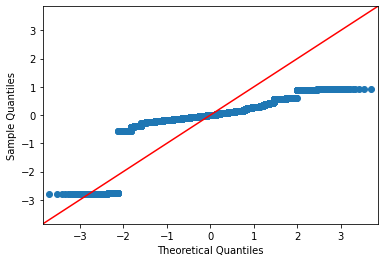

In [11]:
sm.qqplot(residuals, line='45')
plt.show()

In [12]:
f_statistic = model.fvalue
p_value = model.f_pvalue
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 19731.504469809955
P-value: 0.0


In [13]:
coefficients = model.params
p_values = model.pvalues
print("Coefficients:\n", coefficients)
print("P-values:\n", p_values)

Coefficients:
 const    3.860735
HDI      7.128067
TD       0.007427
POP      0.016543
dtype: float64
P-values:
 const    0.000000e+00
HDI      0.000000e+00
TD       1.819340e-08
POP      2.220473e-08
dtype: float64


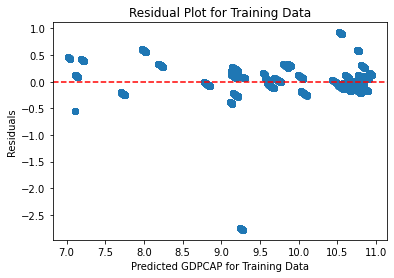

In [17]:
residuals_train = y_train - predicted_values
plt.scatter(predicted_values, residuals_train)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted GDPCAP for Training Data')
plt.ylabel('Residuals')
plt.title('Residual Plot for Training Data')
plt.show()